In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# carregando os dados
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/customers.csv')


In [3]:
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


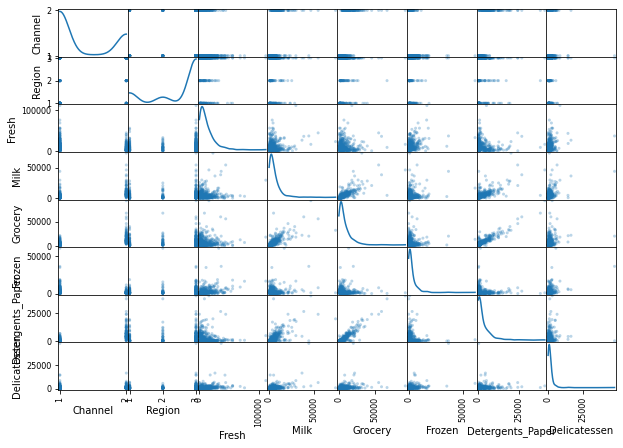

In [4]:
pd.plotting.scatter_matrix(df, alpha=0.3, diagonal ='kde', figsize=(10,7))
plt.show()

In [5]:
#TODO: aplicar transformação logartmica
df = np.log(df)

In [6]:
#implementar PCA
pca = PCA()
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
#criando tabela nova e essa PCA tem os componentes principais
dados_pca = pca.transform(df)

In [8]:
dados_pca

array([[-1.79383392, -0.0689751 , -0.92570948, ...,  0.40925053,
        -0.11851781,  0.25368903],
       [-1.84146438, -0.86857315,  0.20296476, ...,  0.25197688,
        -0.22617109,  0.26605857],
       [-1.93280145, -1.67563076,  1.30716089, ...,  0.35090025,
        -0.24030422,  0.278385  ],
       ...,
       [-3.77819988, -0.92785491, -0.99395451, ..., -0.13531361,
        -0.18238219,  0.02878006],
       [ 1.67217536, -0.47344059,  0.55732067, ..., -0.04233501,
        -0.21532417, -0.0318003 ],
       [ 0.75274791,  3.63628565, -1.97392608, ...,  0.15174462,
        -0.10515642, -0.19916134]])

In [9]:
def pca_results(df, pca):
  '''
  Create a DataFrame of the PCA results
  Includes dimension feature weights and explained variance
  Visualizes the PCA results
  '''
  # Dimension indexing
  dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
  # PCA components
  components = pd.DataFrame(np.round(pca.components_, 4), columns = df.keys())
  components.index = dimensions
  # PCA explained variance
  ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
  variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
  variance_ratios.index = dimensions
  # Create a bar plot visualization
  fig, ax = plt.subplots(figsize = (14,8))
  # Plot the feature weights as a function of the components
  components.plot(ax = ax, kind = 'bar');
  ax.set_ylabel("Feature Weights")
  ax.set_xticklabels(dimensions, rotation=0)
  # Display the explained variance ratios
  for i, ev in enumerate(pca.explained_variance_ratio_):
    ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))
  # Return a concatenated DataFrame
  return pd.concat([variance_ratios, components], axis = 1)

,Explained Variance,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4366,-0.1100,-0.0051,0.1725,-0.3918,-0.4515,0.1717,-0.7412,-0.1476
Dimension 2,0.2697,0.0034,0.0065,-0.6848,-0.1628,-0.0699,-0.4876,-0.0427,-0.5099
Dimension 3,0.1134,-0.0228,-0.0216,-0.6746,0.0343,-0.0303,0.2861,-0.2150,0.6432
Dimension 4,0.0939,0.0024,-0.0346,-0.2121,0.0178,0.0646,0.8045,0.1908,-0.5155
Dimension 5,0.0446,-0.0118,0.0219,-0.0014,0.7230,0.3481,-0.0353,-0.5622,-0.1956
Dimension 6,0.0224,0.0027,0.0885,-0.0308,0.5390,-0.8117,-0.0135,0.2027,-0.0224
Dimension 7,0.0153,-0.0496,-0.9937,0.0136,0.0651,-0.0620,-0.0414,0.0120,-0.0048
Dimension 8,0.0041,0.9924,-0.0507,0.0072,-0.0317,-0.0474,0.0228,-0.0940,-0.0011


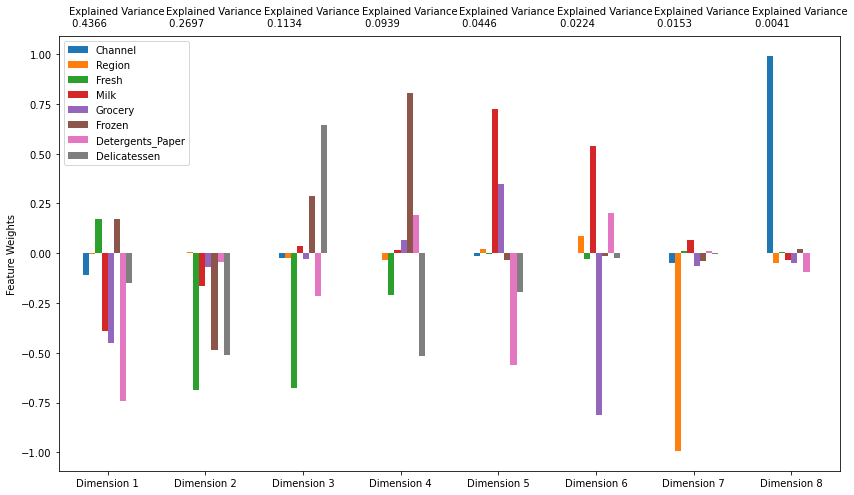

In [10]:
pca_explicacao = pca_results(df, pca)
pca_explicacao

In [11]:
pca_explicacao['Explained Variance'].cumsum()

Dimension 1    0.4366
Dimension 2    0.7063
Dimension 3    0.8197
Dimension 4    0.9136
Dimension 5    0.9582
Dimension 6    0.9806
Dimension 7    0.9959
Dimension 8    1.0000
Name: Explained Variance, dtype: float64

PCA EM PROBLEMAS DE CLASSIFICAÇÃO

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml


In [13]:
mnist = fetch_openml('mnist_784')

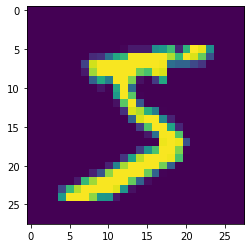

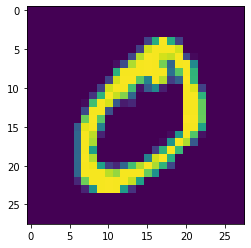

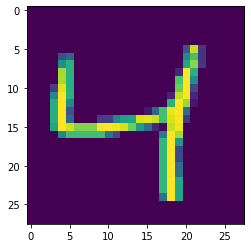

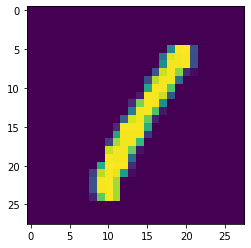

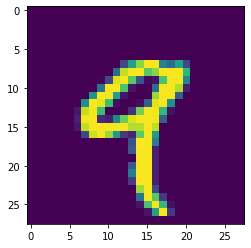

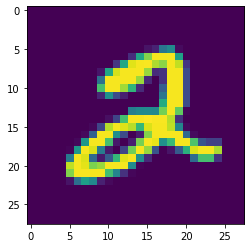

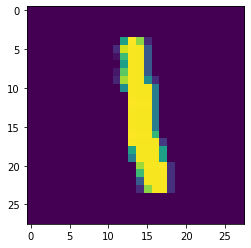

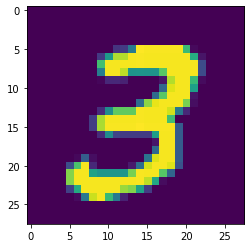

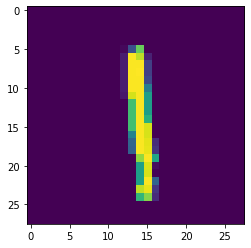

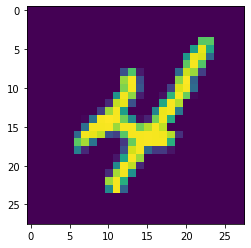

In [15]:
#visualizar um digito 
for i in range(10):
  plt.imshow(mnist.data[i].reshape(28,28).astype(float))
  plt.show()

In [16]:
df_mnist = pd.DataFrame(mnist.data)
df_mnist['target'] = mnist.target

In [18]:
df_mnist.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [20]:
#pegando apenas uma fração da base
np.random.seed(42)
frac = 0.25
df_mnist = df_mnist.sample(frac = frac).reset_index(drop=True)

In [21]:
#criar conjuntos de dados 
X, y = df_mnist.drop('target', axis=1), df_mnist['target']

In [25]:
#definir cjto de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) #aplicando escala no cjto de treino
X_test = scaler.transform(X_test) #aplicando a mesma escala no cjto de teste

In [27]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred)
print(f'ACURACIA ANTES = {100.0 * acc_lr}%')

ACURACIA ANTES =87.3400365630713%


In [29]:
#APLICAÇÃO DO PCA com diferentes percentuais de variância a ser mantido
percentuais = [0.99, 0.95, 0.90]

for percent in percentuais:
  # criar um PCA com aquele percentual
  pca = PCA(percent)

  # tranformar os dados usando o PCA
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)


  # treinar o modelo 
  lr.fit(X_train_pca, y_train)

  # testar o modelo 
  y_pred = lr.predict(X_test_pca)
  acc_lr = accuracy_score(y_test, y_pred)
  print(f'VARIANCIA MANTIDA = {100.0 * percent}% \t ACURACIA = {100.0 * acc_lr}%')

VARIANCIA MANTIDA = 99.0% 	 ACURACIA = 87.15722120658135%
VARIANCIA MANTIDA = 95.0% 	 ACURACIA = 86.70018281535648%
VARIANCIA MANTIDA = 90.0% 	 ACURACIA = 86.24314442413163%


###TSNE NO DATASET DA MNIST

In [32]:
mnist = fetch_openml('mnist_784')

In [31]:
df_mnist = pd.DataFrame(mnist.data)
df_mnist['target'] = mnist.target

In [33]:
# como O TSNE eh NAO supersivisionado
# vamos dividir os dados em X e Y
# e aplicar o TSNE apenas no X

X, y = df_mnist.drop('target', axis=1), df_mnist['target']

In [46]:
# amostra da base de dados (2.5K de linhas para teste inicial)
X = X[:5000]
y = y[:5000]

In [48]:
# implementar o TSNE 
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=40, n_iter=1000)

In [49]:
dados_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


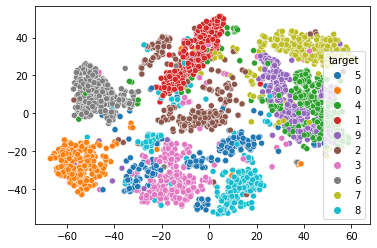

In [50]:
import seaborn as sns 
sns.scatterplot(dados_tsne[:,0], dados_tsne[:,1], hue=y)
plt.show()